In [1]:
! pip install sewar

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sewar: filename=sewar-0.4.5-py3-none-any.whl size=10583 sha256=1039bbd749db888cff6985dc140c4a52b5839fdc9f1f8cf91c987f610d3695e0
  Stored in directory: c:\users\zckqw\appdata\local\pip\cache\wheels\90\c1\d2\90faa299f5473d447a9a489377305840b7268c92b79bb5e000
Successfully built sewar


In [2]:
! pip install scikit-fuzzy

     -------------------------------------- 994.0/994.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=b8b48c7d78f6691b5d2dafc002656d6db260fca52daa8cae911616ea28421a84
  Stored in directory: c:\users\zckqw\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [3]:
%matplotlib inline
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
#from skimage.measure.simple_metrics import compare_psnr
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise
from skimage.color import rgb2gray, rgb2hsv
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
from matplotlib.pylab import *
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp

Menunjukan Citra Asli Gambar Mata Katarak

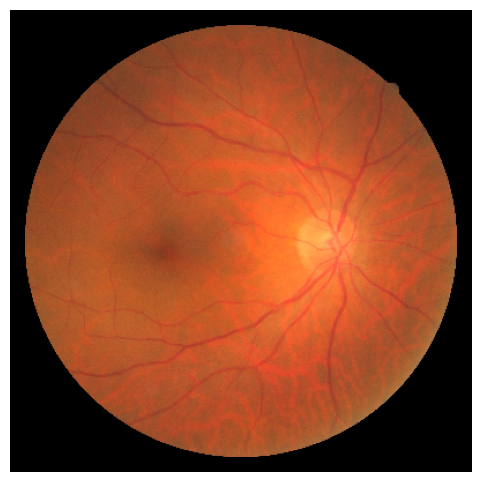

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./FIRE/Images/A13_1.jpg')

# Resize the image
resized_image = cv2.resize(image, (400, 400))

# Convert BGR to RGB
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()


Menunjukan gambar dari citra asli Katarak ke proses Green Channel

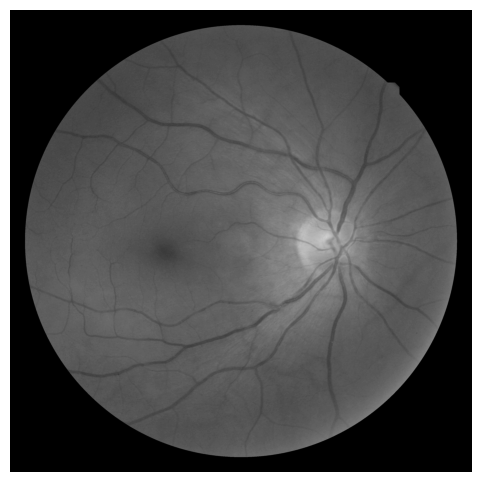

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./FIRE/Images/A13_1.jpg')

# Extract the green channel
green_channel = image[:, :, 1]  # Green channel is at index 1 (0: Blue, 1: Green, 2: Red)

# Display the green channel image
plt.figure(figsize=(6, 6))
plt.imshow(green_channel, cmap='gray')
plt.axis('off')
plt.show()

Menunjukan Proses Dari Citra Asli Mata Katarak ke Proses Clahe

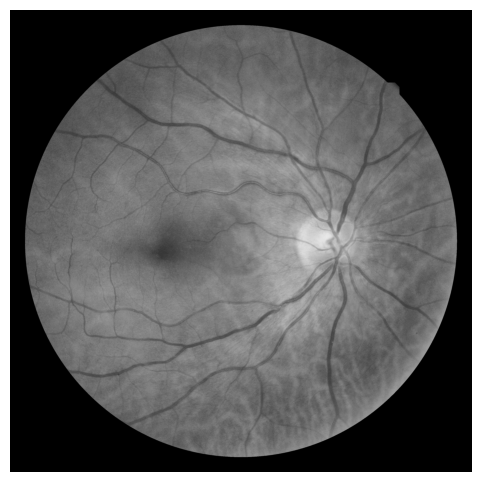

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./FIRE/Images/A13_1.jpg', 0)  # Load as grayscale

# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the image
clahe_image = clahe.apply(image)

# Display the CLAHE-enhanced image
plt.figure(figsize=(6, 6))
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')
plt.show()

Menunjukan Proses citra asli Mata Katarak ke morphological 
opening

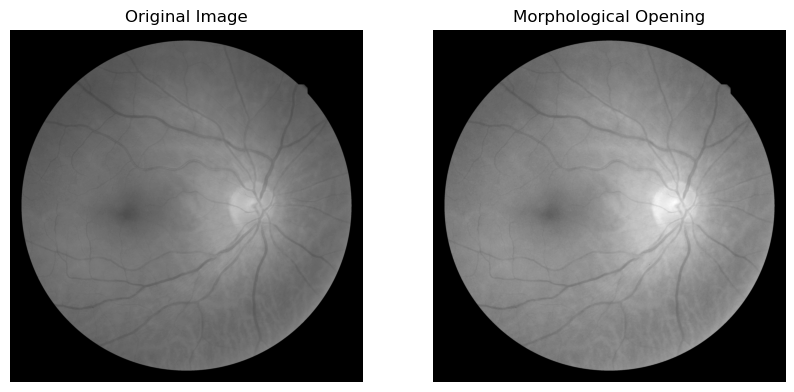

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./FIRE/Images/A13_1.jpg', 0)  # Load as grayscale

# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform morphological opening
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Display the original and opening images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opening, cmap='gray')
plt.title('Morphological Opening')
plt.axis('off')

plt.show()

Proses Citra asli Mata Katarak ke Matched Filter

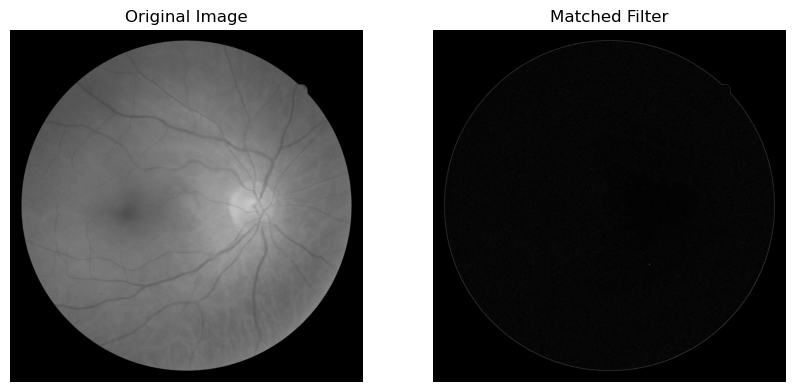

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./FIRE/Images/A13_1.jpg', 0)  # Load as grayscale

# Define the matched filter kernel
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])

# Perform matched filtering
matched_image = cv2.filter2D(image, -1, kernel)

# Display the original and matched filter images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(matched_image, cmap='gray')
plt.title('Matched Filter')
plt.axis('off')

plt.show()

Proses Citra asli Mata Katarak ke masking 

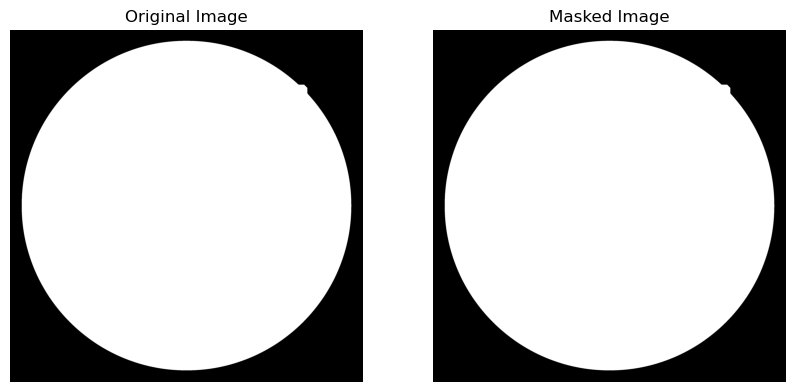

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./FIRE/Masks/mask.png', 0)  # Load as grayscale

# Threshold the image to create a binary mask
_, thresholded = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, thresholded)

# Display the original image and the masked image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_image, cmap='gray')
plt.title('Masked Image')
plt.axis('off')

plt.show()

HASIL DARI SEMUA PROSES Untuk Gambar Mata Katarak

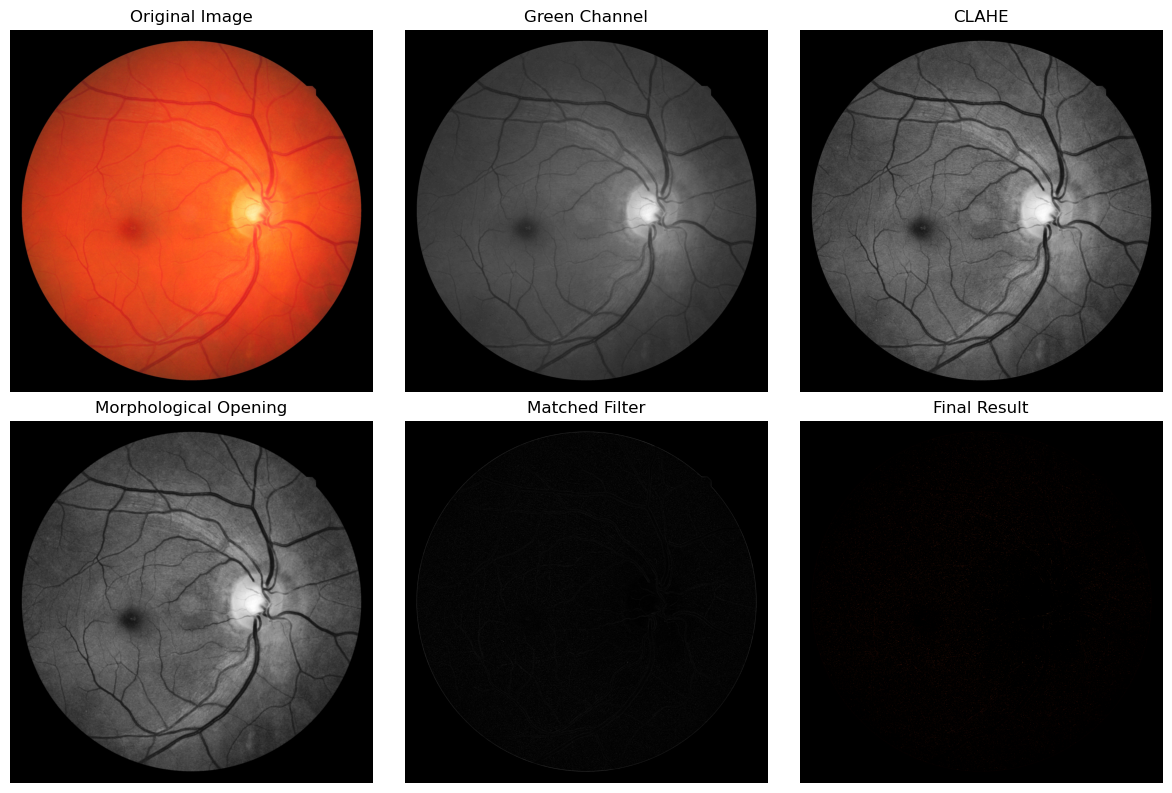

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./FIRE/Images/P03_1.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract the green channel
green_channel = image[:, :, 1]  # Green channel is at index 1 (0: Blue, 1: Green, 2: Red)

# Apply CLAHE to the green channel image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(green_channel)

# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform morphological opening on the CLAHE image
opened_image = cv2.morphologyEx(clahe_image, cv2.MORPH_OPEN, kernel)

# Define the matched filter kernel
matched_filter_kernel = np.array([[1, 1, 1],
                                  [1, -8, 1],
                                  [1, 1, 1]])

# Perform matched filtering on the opened image
matched_filter_image = cv2.filter2D(opened_image, -1, matched_filter_kernel)

# Threshold the matched filter image to create a binary mask
_, thresholded_image = cv2.threshold(matched_filter_image, 50, 255, cv2.THRESH_BINARY)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, image, mask=thresholded_image)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image[:, :, ::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(opened_image, cmap='gray')
plt.title('Morphological Opening')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(matched_filter_image, cmap='gray')
plt.title('Matched Filter')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(masked_image[:, :, ::-1])
plt.title('Final Result')
plt.axis('off')

plt.tight_layout()
plt.show()

Dari proses Segmentasi, menampilkan Box Counting

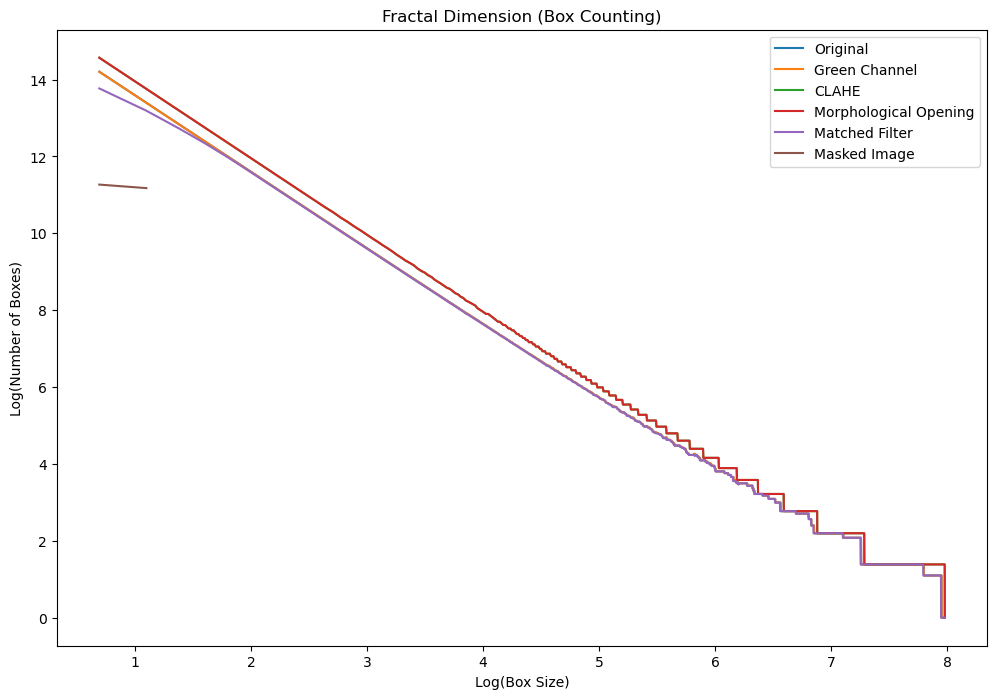

In [8]:
# import cv2
import numpy as np
import matplotlib.pyplot as plt

def box_counting(image, box_size):
    height, width = image.shape[:2]  # Access only height and width
    count = 0
    
    # Loop through the image with the specified box size
    for i in range(0, height, box_size):
        for j in range(0, width, box_size):
            # Check if the box contains any non-zero pixel
            if np.sum(image[i:i+box_size, j:j+box_size]) > 0:
                count += 1
    
    return count

# Load the image
image = cv2.imread('./FIRE/Images/A13_1.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract the green channel
green_channel = image[:, :, 1]  # Green channel is at index 1 (0: Blue, 1: Green, 2: Red)

# Apply CLAHE to the green channel image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(green_channel)

# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform morphological opening on the CLAHE image
opened_image = cv2.morphologyEx(clahe_image, cv2.MORPH_OPEN, kernel)

# Define the matched filter kernel
matched_filter_kernel = np.array([[1, 1, 1],
                                  [1, -8, 1],
                                  [1, 1, 1]])

# Perform matched filtering on the opened image
matched_filter_image = cv2.filter2D(opened_image, -1, matched_filter_kernel)

# Threshold the matched filter image to create a binary mask
_, thresholded_image = cv2.threshold(matched_filter_image, 50, 255, cv2.THRESH_BINARY)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, image, mask=thresholded_image)

# Calculate the box counting dimension for each segmented image
box_sizes = []
box_counts = []

segmented_images = [gray_image, green_channel, clahe_image, opened_image, matched_filter_image, masked_image]
segment_labels = ['Original', 'Green Channel', 'CLAHE', 'Morphological Opening', 'Matched Filter', 'Masked Image']

for i, segment_image in enumerate(segmented_images):
    # Calculate the box counting dimension
    min_box_size = 2
    max_box_size = min(segment_image.shape)
    
    segment_box_sizes = []
    segment_box_counts = []
    
    for box_size in range(min_box_size, max_box_size+1):
        segment_box_sizes.append(box_size)
        segment_box_counts.append(box_counting(segment_image, box_size))
    
    # Store the results
    box_sizes.append(segment_box_sizes)
    box_counts.append(segment_box_counts)

# Plot the results
plt.figure(figsize=(12, 8))

for i in range(len(box_sizes)):
    plt.plot(np.log(box_sizes[i]), np.log(box_counts[i]), label=segment_labels[i])

plt.xlabel('Log(Box Size)')
plt.ylabel('Log(Number of Boxes)')
plt.title('Fractal Dimension (Box Counting)')
plt.legend()
plt.show()

Dari Proses Box Counting menampilkan nilai Fraktal masing-masing segmentasi

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def box_counting(image, box_size):
    height, width = image.shape[:2]  # Access only height and width
    count = 0
    
    # Loop through the image with the specified box size
    for i in range(0, height, box_size):
        for j in range(0, width, box_size):
            # Check if the box contains any non-zero pixel
            if np.sum(image[i:i+box_size, j:j+box_size]) > 0:
                count += 1
    
    return count

# Load the original image
image = cv2.imread('./FIRE/Images/A13_1.jpg', 0)  # Load as grayscale image

# Extract the green channel
green_channel = image[:, :]

# Apply CLAHE to the green channel image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(green_channel)

# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform morphological opening on the CLAHE image
opened_image = cv2.morphologyEx(clahe_image, cv2.MORPH_OPEN, kernel)

# Define the matched filter kernel
matched_filter_kernel = np.array([[1, 1, 1],
                                  [1, -8, 1],
                                  [1, 1, 1]])

# Perform matched filtering on the opened image
matched_filter_image = cv2.filter2D(opened_image, -1, matched_filter_kernel)

# Threshold the matched filter image to create a binary mask
_, thresholded_image = cv2.threshold(matched_filter_image, 50, 255, cv2.THRESH_BINARY)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, image, mask=thresholded_image)

# Calculate the box counting dimension for each segmented image
segment_images = [image, green_channel, clahe_image, opened_image, matched_filter_image, masked_image]
segment_labels = ['Original', 'Green Channel', 'CLAHE', 'Morphological Opening', 'Matched Filter', 'Masked Image']
box_sizes = range(2, min(image.shape)//2)

for i, segment_image in enumerate(segment_images):
    segment_fractal_dimensions = []
    
    for box_size in box_sizes:
        box_count = box_counting(segment_image, box_size)
        fractal_dimension = np.log(box_count) / np.log(box_size)
        segment_fractal_dimensions.append(fractal_dimension)
    
    # Print the average fractal dimension for the segment
    average_fractal_dimension = np.mean(segment_fractal_dimensions)
    print(f"Average Fractal Dimension for {segment_labels[i]}: {average_fractal_dimension}")


Average Fractal Dimension for Original: 0.6558748820996162
Average Fractal Dimension for Green Channel: 0.6558748820996162
Average Fractal Dimension for CLAHE: 0.6874056946162712
Average Fractal Dimension for Morphological Opening: 0.6874056946162712
Average Fractal Dimension for Matched Filter: 0.6546765583108412
Average Fractal Dimension for Masked Image: 0.6475423755080437


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def box_counting(image, box_size):
    height, width = image.shape
    count = 0
    
    # Loop through the image with the specified box size
    for i in range(0, height, box_size):
        for j in range(0, width, box_size):
            # Check if the box contains any non-zero pixel
            if np.sum(image[i:i+box_size, j:j+box_size]) > 0:
                count += 1
    
    return count

# Load the original image
image = cv2.imread('./FIRE/Images/A13_1.jpg', 0)  # Load as grayscale image

# Extract the green channel
green_channel = image[:, :]

# Apply CLAHE to the green channel image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(green_channel)

# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform morphological opening on the CLAHE image
opened_image = cv2.morphologyEx(clahe_image, cv2.MORPH_OPEN, kernel)

# Define the matched filter kernel
matched_filter_kernel = np.array([[1, 1, 1],
                                  [1, -8, 1],
                                  [1, 1, 1]])

# Perform matched filtering on the opened image
matched_filter_image = cv2.filter2D(opened_image, -1, matched_filter_kernel)

# Threshold the matched filter image to create a binary mask
_, thresholded_image = cv2.threshold(matched_filter_image, 50, 255, cv2.THRESH_BINARY)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, image, mask=thresholded_image)

# Calculate the box counting dimension for each segmented image
segment_images = [green_channel, clahe_image, opened_image, masked_image, matched_filter_image]
segment_labels = ['Green Channel', 'CLAHE', 'Morphological Opening', 'Masked Image', 'Matched Filter']
box_sizes = range(2, min(image.shape)//2)

segment_fractal_dimensions = []

for i, segment_image in enumerate(segment_images):
    segment_box_counts = []
    
    for box_size in box_sizes:
        box_count = box_counting(segment_image, box_size)
        segment_box_counts.append(box_count)
    
    segment_fractal_dimensions.append(segment_box_counts)

# Print the fractal dimensions for each segment
for i, segment_fractal_dimension in enumerate(segment_fractal_dimensions):
    print(f"Fractal Dimensions for {segment_labels[i]}:")
    print(segment_fractal_dimension)
    print()

Fractal Dimensions for Green Channel:
[1466042, 652792, 366618, 235486, 163541, 120389, 91658, 72946, 59112, 48923, 41042, 35093, 30280, 26421, 23092, 20602, 18374, 16517, 14895, 13560, 12338, 11319, 10336, 9592, 8872, 8239, 7639, 7153, 6688, 6282, 5852, 5562, 5233, 4944, 4668, 4436, 4203, 3993, 3780, 3605, 3455, 3287, 3135, 3017, 2894, 2763, 2638, 2561, 2458, 2367, 2271, 2204, 2113, 2047, 1960, 1903, 1839, 1777, 1716, 1670, 1616, 1561, 1507, 1473, 1433, 1391, 1353, 1303, 1280, 1237, 1201, 1175, 1143, 1111, 1086, 1056, 1030, 1007, 978, 953, 935, 917, 891, 872, 850, 835, 806, 800, 788, 772, 751, 738, 716, 708, 689, 681, 667, 659, 644, 625, 619, 610, 600, 586, 577, 568, 551, 543, 537, 532, 516, 508, 502, 493, 486, 477, 467, 461, 455, 450, 441, 431, 427, 423, 417, 413, 398, 393, 388, 386, 381, 376, 374, 361, 359, 359, 351, 345, 343, 335, 329, 326, 324, 319, 316, 310, 306, 298, 298, 294, 291, 293, 289, 287, 278, 271, 268, 267, 265, 259, 257, 257, 253, 251, 247, 239, 239, 241, 241, 241, 235